In [1]:
#Lets see how to predict stock price using ML techniques
# import necessary libraries
import numpy as np 
import pandas as pd  
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data using pandas 
df = pd.read_csv('../Data/dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-14,392.932007,407.230011,392.932007,407.230011,407.230011,74469800.0
1,2016-02-15,407.567993,410.381012,397.748993,400.184998,400.184998,74070496.0
2,2016-02-16,401.432007,408.945007,401.432007,407.488007,407.488007,73093104.0
3,2016-02-17,407.656006,421.166992,406.783997,416.321991,416.321991,83193600.0
4,2016-02-18,416.571991,425.996002,415.638000,422.372986,422.372986,76752600.0


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1828 non-null   datetime64[ns]
 1   Open       1824 non-null   float64       
 2   High       1824 non-null   float64       
 3   Low        1824 non-null   float64       
 4   Close      1824 non-null   float64       
 5   Adj Close  1824 non-null   float64       
 6   Volume     1824 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 100.1 KB


In [4]:
df.nunique(axis=0)

Date         1828
Open         1823
High         1823
Low          1824
Close        1822
Adj Close    1822
Volume       1824
dtype: int64

In [5]:
pd.isnull(df).sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [6]:
df.dropna(how='any', inplace=True)

In [7]:
pd.isnull(df).sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.set_index('Date', inplace=True)

In [9]:
df.index

DatetimeIndex(['2016-02-14', '2016-02-15', '2016-02-16', '2016-02-17',
               '2016-02-18', '2016-02-19', '2016-02-20', '2016-02-21',
               '2016-02-22', '2016-02-23',
               ...
               '2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08',
               '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12',
               '2021-02-13', '2021-02-14'],
              dtype='datetime64[ns]', name='Date', length=1824, freq=None)

In [10]:
y_df = df['Close'] #stock prediction for close column only.
y_df

Date
2016-02-14      407.230011
2016-02-15      400.184998
2016-02-16      407.488007
2016-02-17      416.321991
2016-02-18      422.372986
                  ...     
2021-02-10    44918.183594
2021-02-11    47909.332031
2021-02-12    47504.851563
2021-02-13    47105.515625
2021-02-14    48832.718750
Name: Close, Length: 1824, dtype: float64

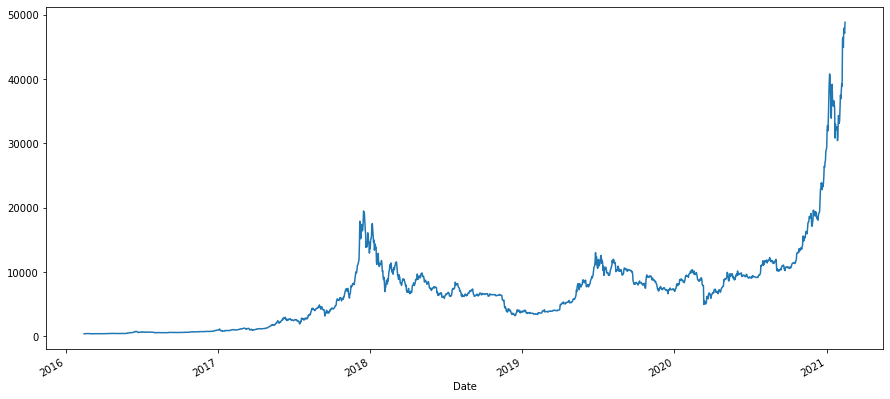

In [11]:
y_df.plot(figsize=((15, 7)))
plt.show()

In [12]:
#LSTM as very sensitive for scale data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

In [ ]:
# Time series data we should split the data with respect to date because it will depend on previous data, so we should split this data based up on date.

In [ ]:
#splitting dataset, train and test
training_size = int(len(df1)*0.75)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [ ]:
training_size, test_size

In [ ]:
# convert an array of values into a dataset matrix
# Reshape into X=t, t+1, t+2....t+n and Y=t+n+1
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(x_train.shape), print(y_train.shape)

In [ ]:
print(x_test.shape), print(y_test.shape)

In [ ]:
# Reshape input to be [sample, time steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
# Create the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df = df.dropna(how='any',axis=0)

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
plt.figure(0, figsize=(12, 8))
plt.title('Close Price History', fontsize=14)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD($)', fontsize=14)
plt.show()

In [ ]:
X, Y = df.drop(columns=['Date', 'Close'], axis=1), df['Close']

In [ ]:
X = np.asarray(X)
Y = np.asarray(Y)
X, Y

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state=42)

In [ ]:
linear = LinearRegression()
linear.fit(x_train, y_train)

In [ ]:
print('Training: {:6.2f}%'.format(100*linear.score(x_train, y_train)))
print('Validation: {:6.2f}%'.format(100*linear.score(x_test, y_test)))

In [ ]:
y_pred = linear.predict(y_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))